In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seab
import mysql.connector
from mysql.connector import Error

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1234',
    database='sprint4',
    auth_plugin='mysql_native_password'
)

cursor = conn.cursor()

print("Conecció entre pupyter y mysql")


Conecció entre pupyter y mysql


In [ ]:
#cerrar
cursor.close()
conn.close()

In [ ]:
#saber nom taules
cursor.execute("SHOW TABLES")
tablas=cursor.fetchall()
tablas

In [ ]:
#pillar una tabla
transactions_df = pd.read_sql(f"SELECT * FROM transaction", conn)
#mirar cantidad de lineas y columnas
transactions_df.shape
#ultimas
transactions_df.tail(5)
#primeras
transactions_df.head(5)
#info
transactions_df.describe()
#tipo de datos
transactions_df.dtypes

In [ ]:
#filtro
filtroDenegadas=transactions_df["declined"]==1
transactions_df[filtroDenegadas]

filtroNoDenegadas=transactions_df["declined"]==0
transactions_df[filtroNoDenegadas]

In [ ]:
#filas en concreto
transactions_df.loc[10:13]
transactions_df.loc[10:13,["id","amount"]]

In [ ]:
#nueva columna a partir de x cosa
transactions_df["BigAmount"]=transactions_df["amount"]>490
transactions_df.dtypes
transactions_df[transactions_df["BigAmount"]]

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_10448\155127531.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  companies_df = pd.read_sql(f"SELECT * FROM companies", conn)


<Axes: xlabel='count', ylabel='country'>

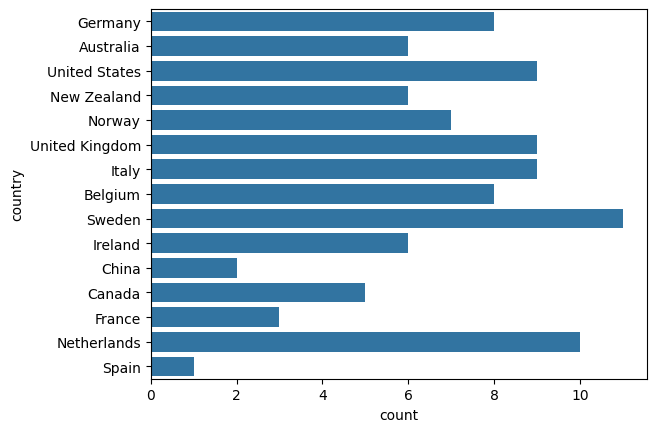

In [49]:
#tabla variable categorica
companies_df = pd.read_sql(f"SELECT * FROM companies", conn)
seab.countplot(data=companies_df,y="country")

<Axes: xlabel='Count', ylabel='amount'>

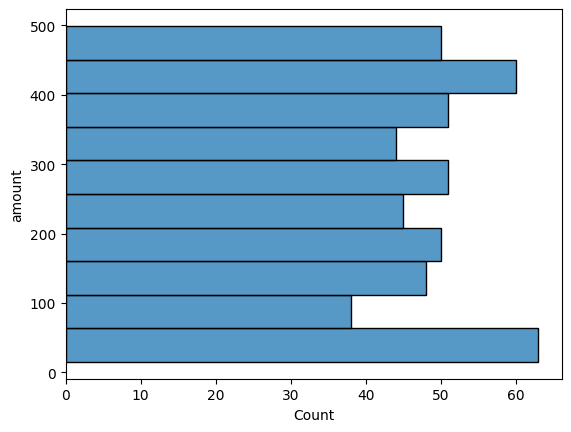

In [52]:
#tabla variable numerica
seab.histplot(data=transactions_df[filtroNoDenegadas],y="amount")

<Axes: xlabel='country', ylabel='amount'>

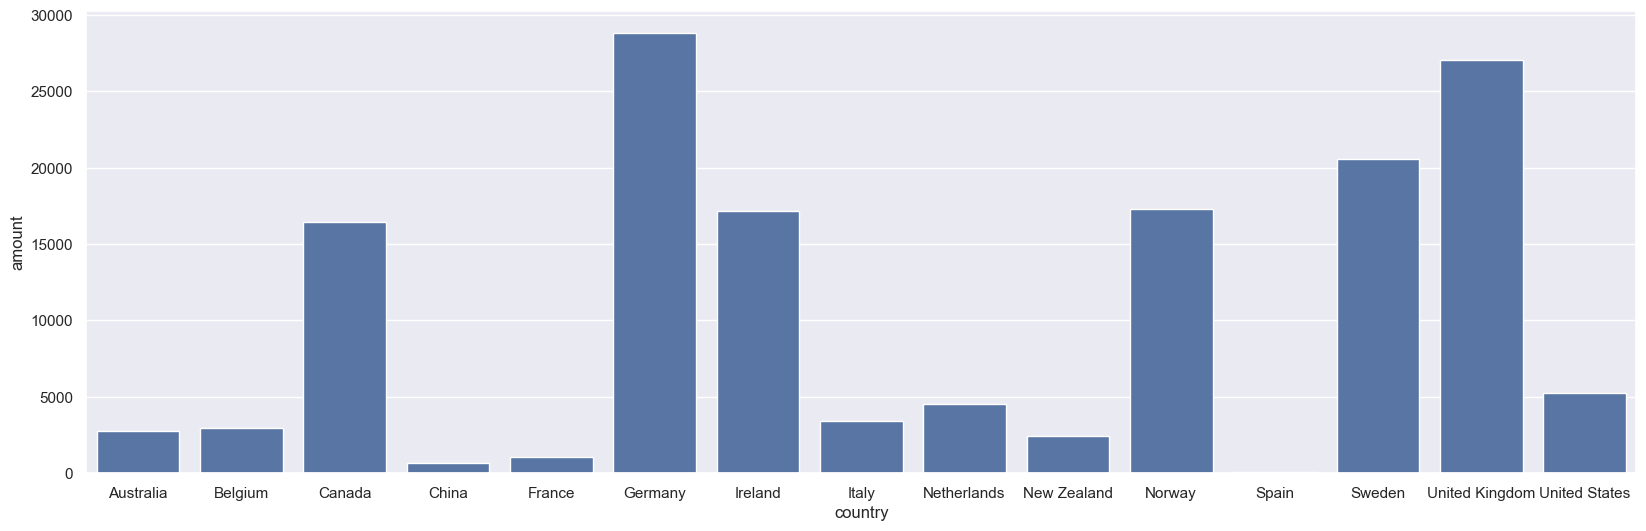

In [88]:
seab.set_theme()
merged_df = transactions_df.merge(
    companies_df, 
    left_on='business_id', 
    right_on='company_id', 
    how='inner'
)
plt.figure(figsize=(20, 6)) 
grouped_df = merged_df.groupby("country", as_index=False)["amount"].sum()
seab.barplot(data=grouped_df,x="country",y="amount")

In [51]:
#borrar base de datos
cursor = conn.cursor()
cursor.execute("DROP DATABASE IF EXISTS prueba")
cursor.close()

True